# IRIS-Flower-clustering

[Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)
Этот проект представляет собой применение машинного обучения с программированием на Python на примере кластеризации цветов IRIS с использованием машинного обучения с инструментами scikit. 

Алгоритмы, используемые для кластеризации:

- [k-means](https://scikit-learn.org/stable/modules/clustering.html#k-means)
- [DBSCAN](https://scikit-learn.org/stable/modules/clustering.html#dbscan)

[дополнительно почитать](https://neerc.ifmo.ru/wiki/index.php?title=%D0%9A%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F#:~:text=%D0%9A%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F%20(%D0%B0%D0%BD%D0%B3%D0%BB.,%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D1%83%20%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%20%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B1%D0%B5%D0%B7%20%D1%83%D1%87%D0%B8%D1%82%D0%B5%D0%BB%D1%8F.)

В качестве задания вам предлагается повторить данные действия по визуализации и кластеризации для наборов данных (можно выбрать, что больше понравится, но лучше сделать для всех)
- [User Knowledge Modeling Data Set](http://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)
- [Blood Transfusion Service Center Data Set](http://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center)
- [Somerville Happiness Survey Data Set](http://archive.ics.uci.edu/ml/datasets/Somerville+Happiness+Survey)
- [Wine Quality Data Set](https://archive.ics.uci.edu/ml/datasets/wine+quality)



In [65]:
# Подключаем библиотеки
import pandas as pd # Работа с набором данных
import numpy as np # Линейная алгебра
# Визуализация данных
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# отключение информационных сообщений
from warnings import filterwarnings
filterwarnings(action='ignore')

# разделение выборки
from sklearn.model_selection import train_test_split

#Метод K-средних
from sklearn.cluster import KMeans
#Метод DBSCAN
from sklearn.cluster import DBSCAN

from sklearn import metrics

In [50]:
# читаем данные
url = 'https://github.com/yakushinav/mfc_ml/raw/main/iris.csv'
data = pd.read_csv(url)
#Выделим только значения параметров для кластеризации
X=data.iloc[:, [0, 1, 2, 3]].values

# Метод k-средних

Метод K-средних (Алгоритм Ллойда)
Основная идея заключается в том, что на каждой итерации перевычисляется центр масс для каждого кластера, полученного на предыдущем шаге, затем объекты снова разбиваются на кластеры в соответствии с тем, какой из новых центров оказался ближе по выбранной метрике. Алгоритм завершается, когда на какой-то итерации не происходит изменения внутрикластерного расстояния.

Метод k-средних пытается сгруппировать похожие элементы в три этапа:

1. Выберем значение k
2. Инициализируем центроиды (разделительные линии)
3. Выберем группу и найдем среднее значение расстояния между точками.

Этот процесс будет продолжаться до тех пор, пока мы не переберем все возможные сочетания пар точек и не уточним границы кластеров. Стабильность центроидов определяется путем сравнения абсолютного значения изменения среднего Евклидова расстояния (Euclidian Distance) между наблюдениями и их соответствующими центроидами с пороговым значением.

Одна из самых сложных задач в этом алгоритме кластеризации – выбрать правильные значения k. Существует два метода.

**Метод локтя** (Elbow Rule) – один из самых известных методов, с помощью которого вы можете выбрать правильное значение k и повысить производительность Модели (Model). Этот эмпирический метод вычисляет сумму квадратов расстояний между точками и вычисляет Среднее значение (Mean).

Когда значение k равно 1, сумма квадрата внутри кластера будет большой. По мере увеличения значения k сумма квадратов расстояний внутри кластера будет уменьшаться.

**Метод силуэта**
Метод силуэта (Silhouette Method) вычисляет среднее расстояние между точками в своем кластере $a_i$ и среднее расстояние от точек до следующего ближайшего кластера, называемого $b_i$.

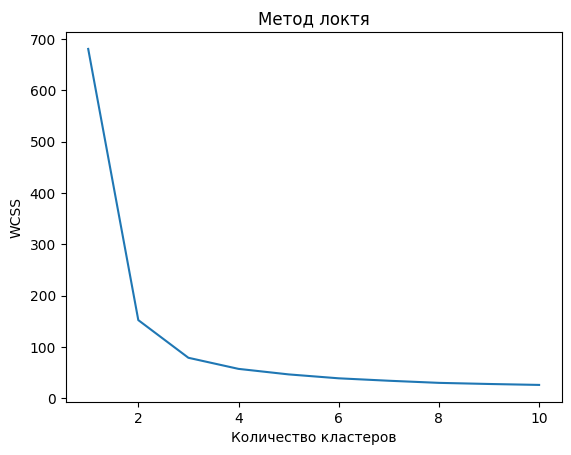

In [51]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Нарисуем график зависимости среднего расстояния от количества кластеров используя метод локтя.
plt.plot(range(1, 11), wcss)
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS') # Сумма квадратов расстояний
plt.show()

Собственно оптимальное значение будет там, где возникает "локоть", т.е. в нашем случае k=3.

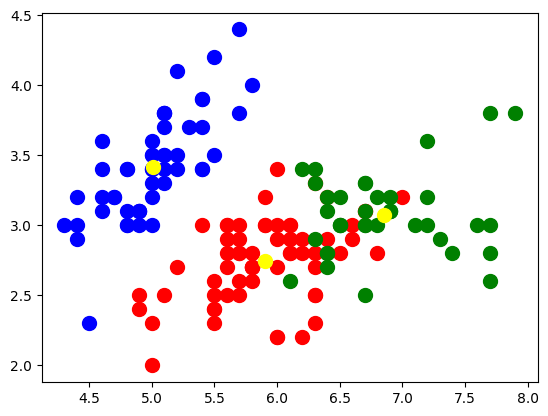

In [63]:
# Применим кластеризацию
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

# Отобразим кластеры

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')
# Отобразим центроиды
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')


# DBSCAN

Основная идея метода заключается в том, что алгоритм разделит заданный набор точек в некотором пространстве на группы точек, которые лежат друг от друга на большом расстоянии. Объекты, которые лежат отдельно от скоплений с большой плотностью, будут помечены как шумовые.

На вход алгоритму подаётся набор точек, параметры ϵ  (радиус окружности) и m (минимальное число точек в окрестности). Для выполнения кластеризации потребуется поделить точки на четыре вида: основные точки, прямо достижимые, достижимые и шумовые.

- Точка является основной, если в окружности с центром в этой точке и радиусом ϵ  находится как минимум m точек.
- Точка a  является прямо достижимой из основной точки b, если a
 находится на расстоянии, не большем ϵ  от точки b
- Точка a является достижимой из b, если существует путь $p_1,\ldots,p_n$ с $p_1=a$ и $p_n=b$, где каждая точка $p_{i+1}$ прямо достижима из точки $p_i$
- Все остальные точки, которые не достижимы из основных точек, считаются шумовыми.

Основная точка вместе со всеми достижимыми из нее точками формирует кластер. В кластер будут входить как основные, так и неосновные точки. Таким образом, каждый кластер содержит по меньшей мере одну основную точку.

Алгоритм начинается с произвольной точки из набора, которая еще не просматривалась. Для точки ищется ϵ
-окрестность. Если она не содержит как минимум m
 точек, то помечается как шумовая, иначе образуется кластер K
, который включает все точки из окрестности. Если точка из окрестности уже является частью другого кластера Cj
, то все точки данного кластера добавляются в кластер K
. Затем выбирается и обрабатывается новая, не посещённая ранее точка, что ведёт к обнаружению следующего кластера или шума.

На выходе получаем разбиение на кластеры и шумовые объекты. Каждый из полученных кластеров Cj
 является непустым множеством точек и удовлетворяет двум условиям:

Любые две точки в кластере попарно связаны (то есть найдется такая точка в кластере, из которой достижимы обе этих точки).
Если точка достижима из какой-либо точки кластера, то она принадлежит кластеру.

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1
  1  1 -1  1  1  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1  1  1  1 -1 -1  1
  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]
     sepal_length  sepal_width  petal_length  petal_width  pred_label
0             5.1          3.5           1.4          0.2           0
1             4.9          3.0           1.4          0.2           0
2             4.7          3.2           1.3          0.2           0
3             4.6          3.1           1.5          0.2           0
4             5.0          3.6           1.4          0.2           0
..            ...          ...           ...          ...         ...
145           6.7          3.0           5.2        

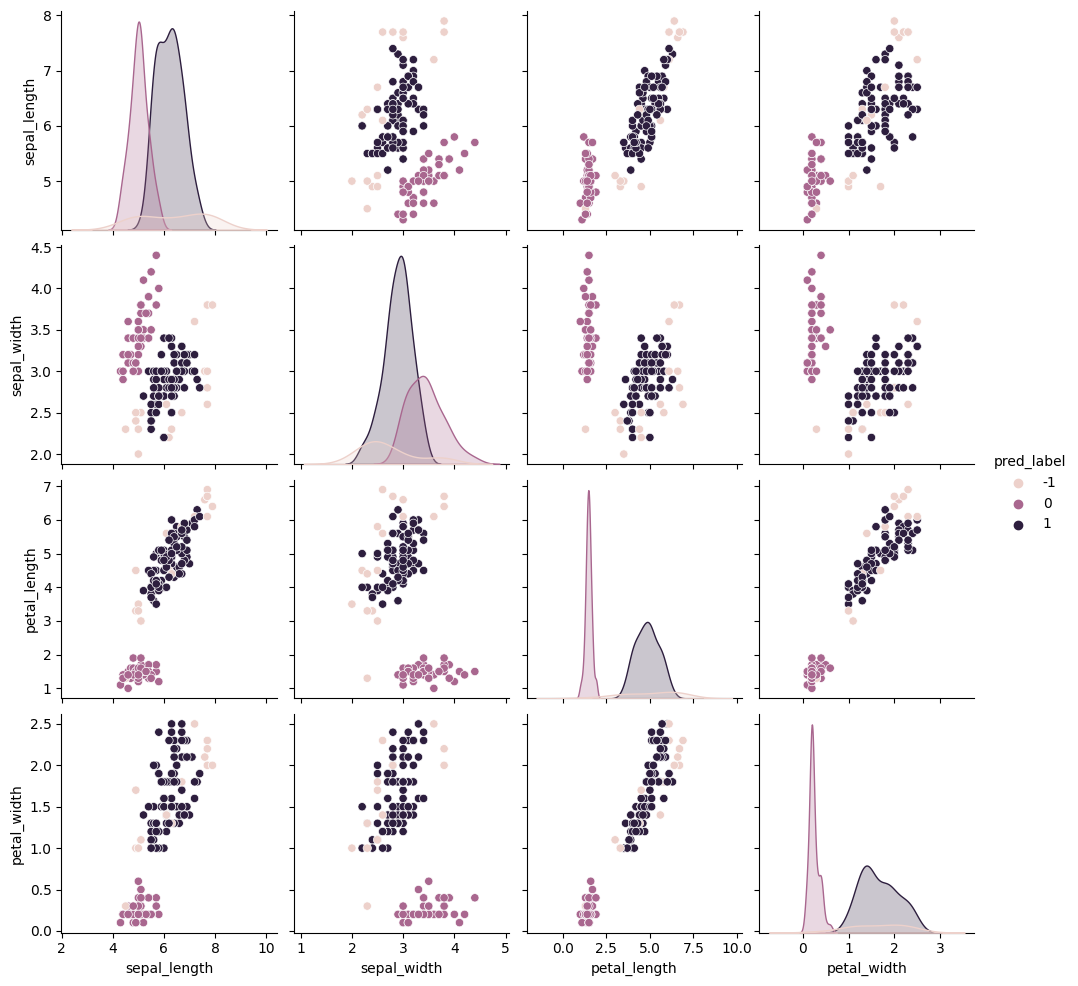

In [74]:
X=data[['sepal_length','sepal_width','petal_length','petal_width']]

db = DBSCAN(eps=0.5, min_samples=5)
y_pred= db.fit_predict(X)
print(db.labels_)


y_pred_df = pd.DataFrame(y_pred)
y_pred_df.columns=['pred_label']

val = pd.concat([X,y_pred_df],axis=1)

print(val)

sns.color_palette("pastel")
sns.pairplot(val,hue='pred_label')
plt.show()
